In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
assets = ['BTC-GBP', 'ETH-GBP', 'BNB-GBP', 'ADA-GBP', 'MATIC-GBP', 'SOL-GBP']
start = '2006-08-21'
end = '2023-04-20'
rfr = 0.0472

price = yf.download(assets, start, end)['Close'].dropna()

[*********************100%***********************]  6 of 6 completed


In [3]:
returns = np.log(price / price.shift(1)).dropna()
annReturns = round(returns.mean()*365.25, 3)

In [4]:
risk = returns.std()
annRisk = round(risk * np.sqrt(365.25), 3)

In [5]:
sharpe = (annReturns - rfr) / annRisk

In [6]:
df = {'annRet':annReturns, 'annRisk':annRisk, 'sharpe':sharpe}
df = pd.DataFrame(df).reset_index()
df.rename(columns={'index':'ticker'}, inplace=True)
mainPath = 'logos/'
df['path'] = mainPath + df['ticker'] + '.png'

In [7]:
def getImage(path, sFactor):
    return OffsetImage(plt.imread(path), zoom=0.35*sFactor, alpha = 1)

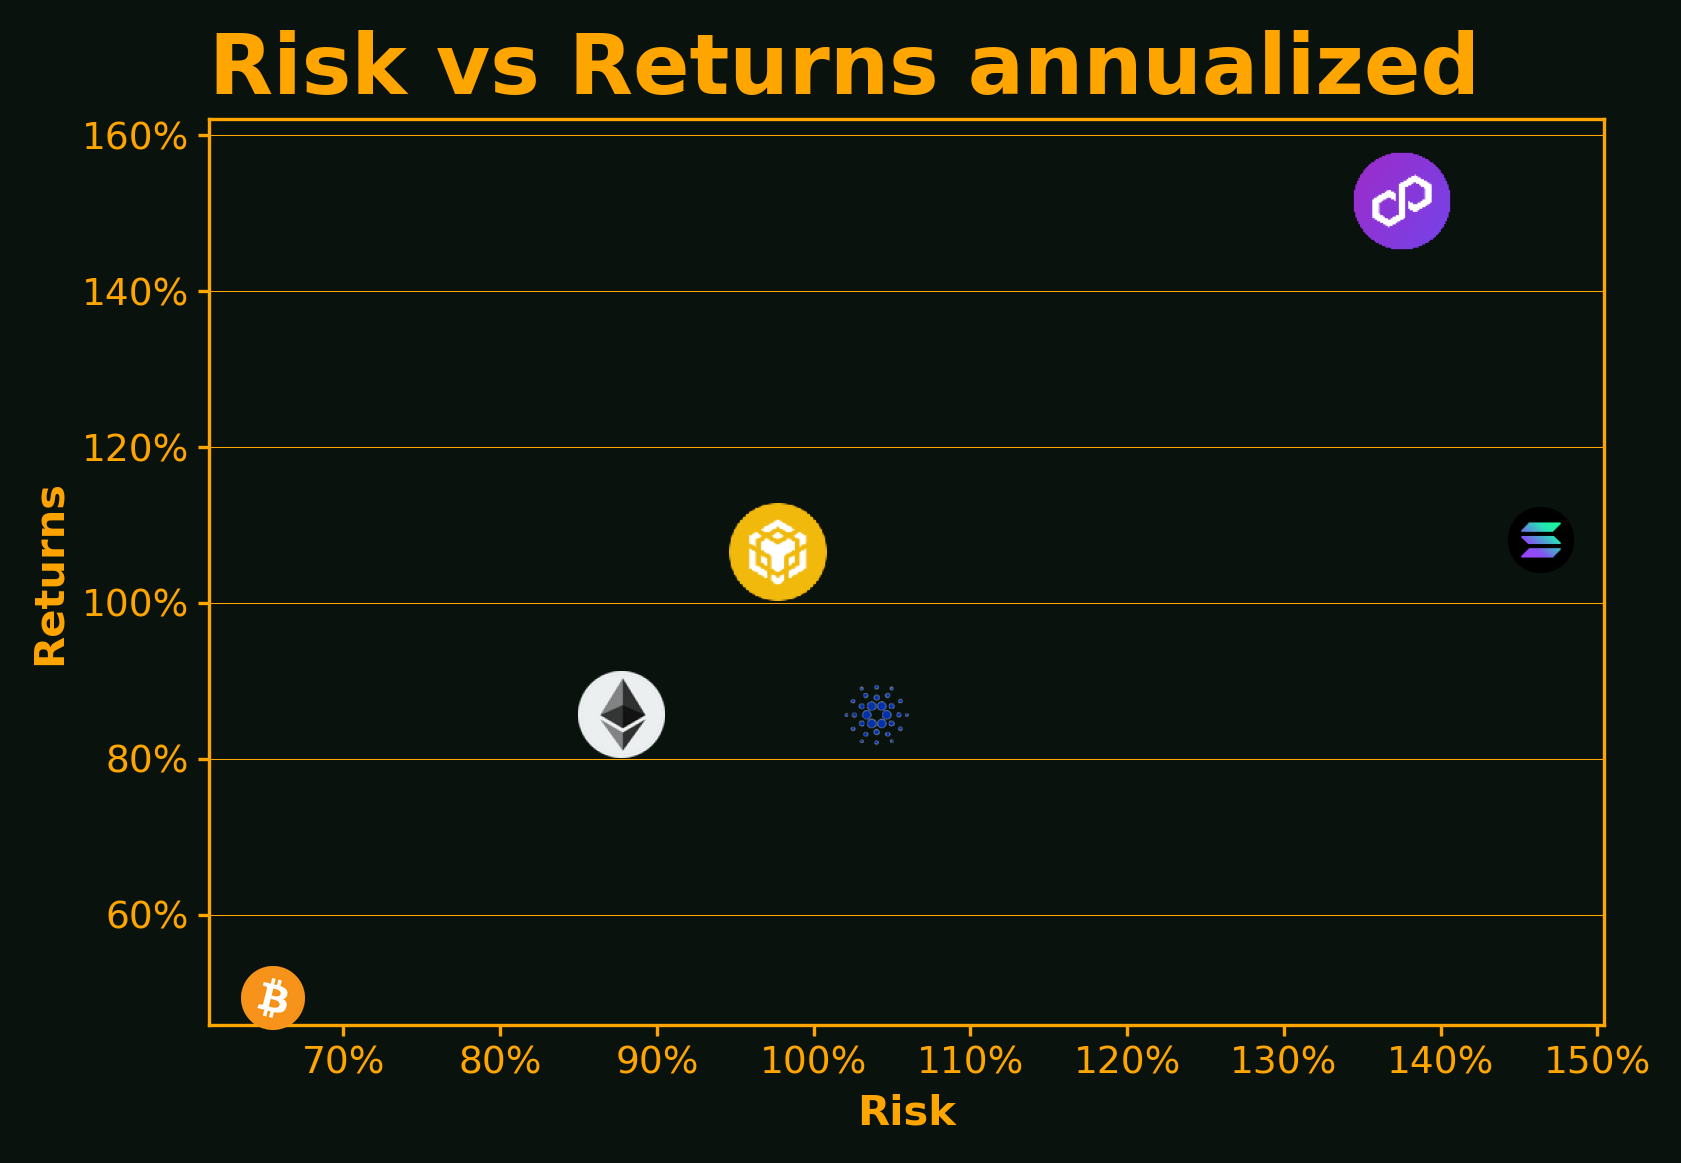

In [8]:
# Set the style
plt.style.use('/Users/visuntandel/My Drive (visuntandzel@gmail.com)/professional/VAResearch/Templets/BrandIdentity/VARPlots/BB/BBReturnLine.mplstyle')

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.scatter(df['annRisk'], df['annRet'], alpha=0)


# Labeling Graph
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns annualized', fontsize= 20, fontweight='bold')

# Format the axis tick labels as percentages with one decimal place
fmt = '%.1f%%'
tick = ticker.PercentFormatter(xmax=1, decimals=0, symbol='%')
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
fscale = 0.07
ax.set_ylim(df['annRet'].min()*(1-fscale),df['annRet'].max()*(1+fscale))

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path'], row['sharpe']), (row['annRisk'], row['annRet']), frameon=False)
    ax.add_artist(ab)

In [9]:
covReturns = returns.cov()

In [10]:
pRet=[]
pVol=[]
pSha=[]
pWeights=[]

numAssets = len(df['ticker'])
numPortfolios = 10000000

In [11]:
for portfolio in range (numPortfolios):
    weights = np.random.random(numAssets)
    weights = weights/np.sum(weights)
    pWeights.append(weights)
    returns = np.dot(weights, annReturns)
    
    pRet.append(returns)
    var = covReturns.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    stdvReturns = sd*np.sqrt(365.25)
    pVol.append(stdvReturns)
    sharpe = (returns-rfr)/stdvReturns
    pSha.append(sharpe)

In [12]:
dataData = {'Returns':pRet, 'Volatility':pVol, 'Sharpe':pSha}

for counter, symbol in enumerate(df['ticker'].tolist()): #Add cleaner versions.
    
    dataData[symbol+'weight']=[w[counter] for w in pWeights]
portfolios = pd.DataFrame(dataData)
portfolios.head()

,Returns,Volatility,Sharpe,ADA-GBPweight,BNB-GBPweight,BTC-GBPweight,ETH-GBPweight,MATIC-GBPweight,SOL-GBPweight
0,0.967722,0.859852,1.070558,0.187987,0.100652,0.226339,0.148583,0.223239,0.113200
1,0.916757,0.840594,1.034456,0.219880,0.141388,0.213441,0.149835,0.106999,0.168457
2,0.980233,0.928532,1.004848,0.212425,0.036549,0.103299,0.225962,0.136073,0.285692
3,1.079806,0.939266,1.099375,0.287204,0.281814,0.019115,0.045056,0.204840,0.161971
4,1.103189,0.913016,1.156595,0.052158,0.415976,0.027793,0.241130,0.255943,0.006999


In [13]:
w= len(df['ticker']) / 100
bmpReturns = np.mean(w*annReturns)
bmpVolatility = np.mean(w*annRisk)
bmpSharpe = (bmpReturns-rfr)/bmpVolatility
print('\nReturns: ', bmpReturns, '\nVolatility:', bmpVolatility, '\nSharpe:', bmpSharpe)


Returns:  0.05867 
Volatility: 0.06387999999999999 
Sharpe: 0.17955541640576084


In [14]:
minVolPortfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]
minVolPortfolio

Returns            0.561468
Volatility         0.663424
Sharpe             0.775173
ADA-GBPweight      0.037673
BNB-GBPweight      0.033075
BTC-GBPweight      0.873142
ETH-GBPweight      0.012530
MATIC-GBPweight    0.013031
SOL-GBPweight      0.030549
Name: 3241794, dtype: float64

In [15]:
optRiskPortfolio = portfolios.iloc[portfolios['Sharpe'].idxmax()]
optRiskPortfolio

Returns            1.225342
Volatility         1.004625
Sharpe             1.172718
ADA-GBPweight      0.012261
BNB-GBPweight      0.468013
BTC-GBPweight      0.000123
ETH-GBPweight      0.089375
MATIC-GBPweight    0.402705
SOL-GBPweight      0.027523
Name: 4977474, dtype: float64

/var/folders/9q/lmp5f59j3f15tmmxjy90v_hc0000gn/T/ipykernel_21389/4004521.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(scatter)


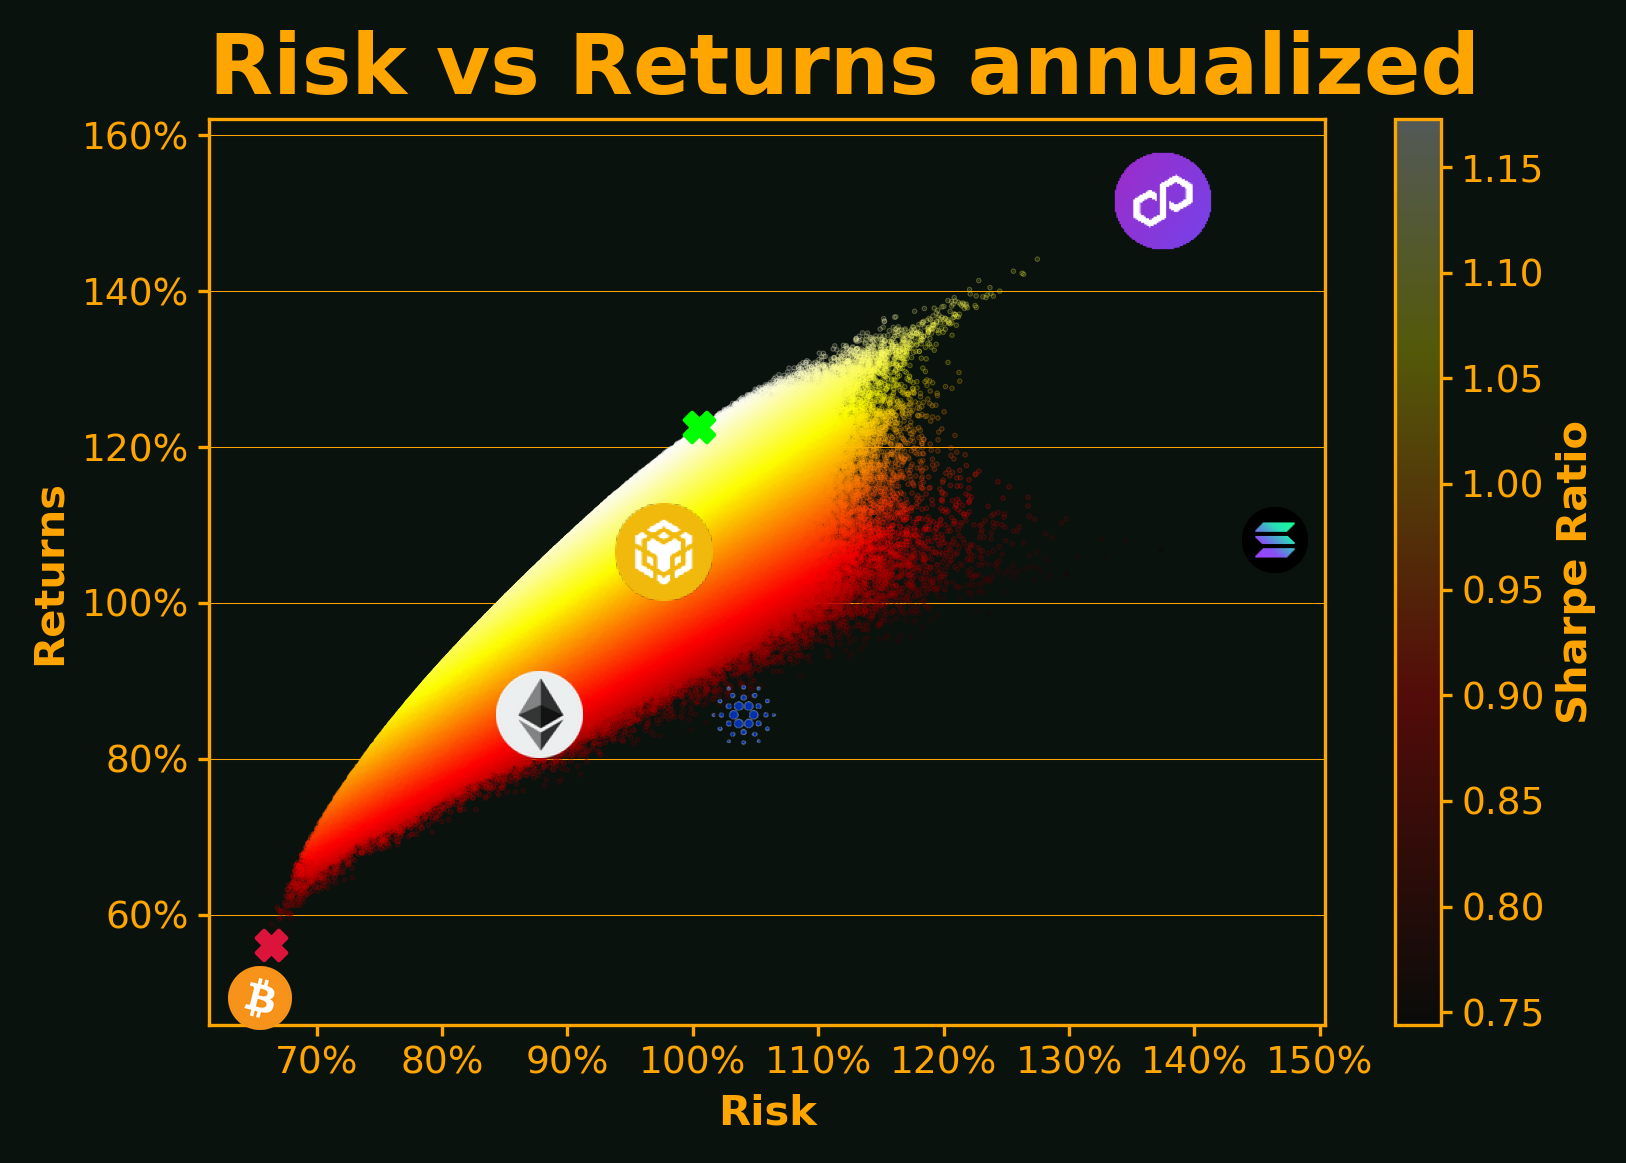

In [16]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.scatter(df['annRisk'], df['annRet'], alpha=0)


# Labeling Graph
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns annualized', fontsize= 20, fontweight='bold')

scatter = ax.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', c=pSha, cmap='hot', s=0.1, alpha=0.3)

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Sharpe Ratio')

# Format the axis tick labels as percentages with one decimal place
fmt = '%.1f%%'
tick = ticker.PercentFormatter(xmax=1, decimals=0, symbol='%')
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
fscale = 0.07
ax.set_ylim(df['annRet'].min()*(1-fscale),df['annRet'].max()*(1+fscale))

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path'], row['sharpe']), (row['annRisk'], row['annRet']), frameon=False)
    ax.add_artist(ab)

plt.scatter(minVolPortfolio[1], minVolPortfolio[0], color='crimson', marker='X', s=50)
plt.scatter(optRiskPortfolio[1], optRiskPortfolio[0], color='lime', marker='X', s=50)